In [1]:
import sys
sys.path
sys.path.append("../")
sys.path.append("../../")

In [1]:
from sklearn.ensemble import RandomForestClassifier

# Local application imports
from xai_compare.factory import ComparisonFactory 
from xai_compare.datasets import german_credit
from xai_compare.config import MODE, COMPARISON_TECHNIQUES

In [2]:
# define the model
model = RandomForestClassifier(max_depth=4, n_estimators=100, random_state=42)

# define the data
X, y = german_credit()

# define the mode
mode = MODE.CLASSIFICATION

Explainers: 100%|██████████| 3/3 [10:54<00:00, 218.10s/it]


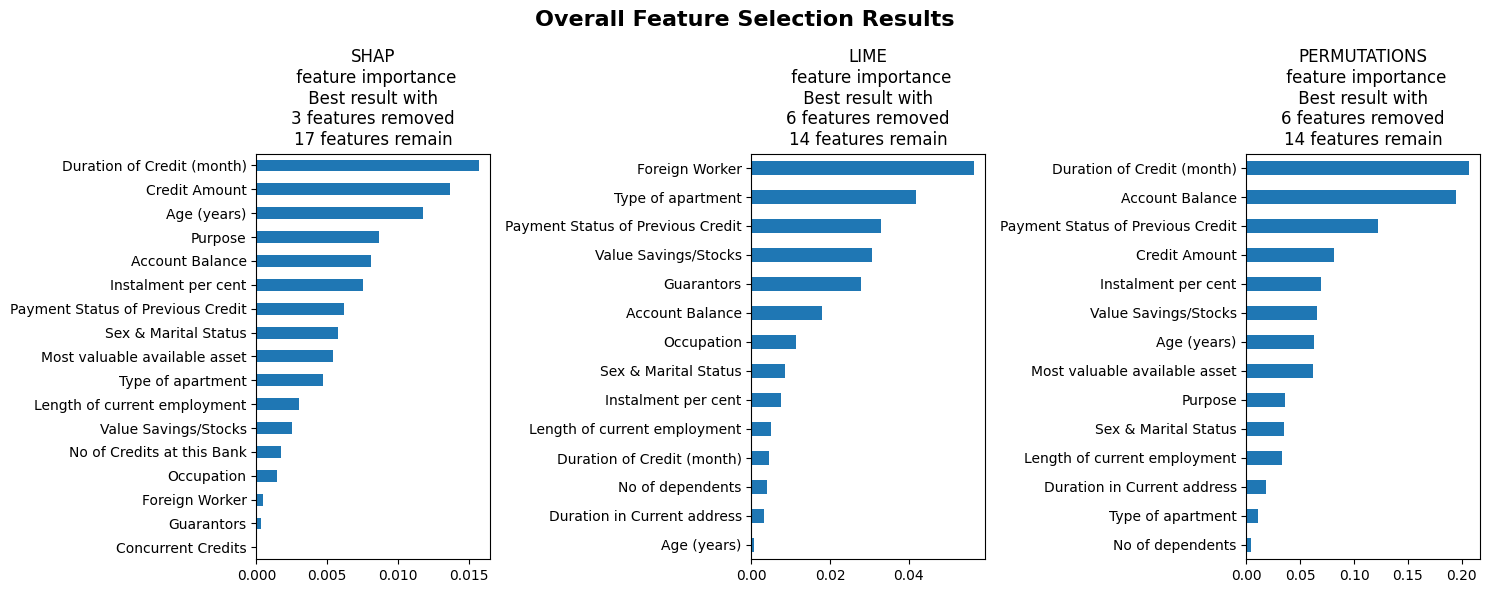

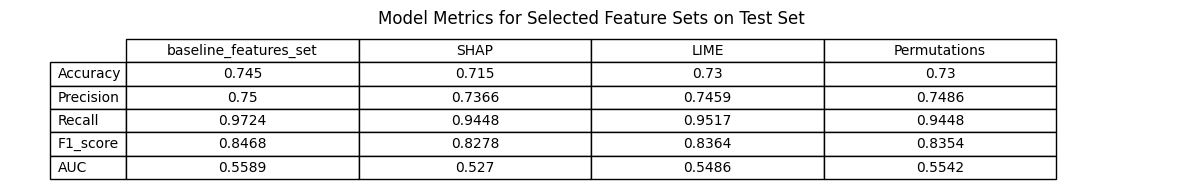

Processing folds: 100%|██████████| 5/5 [01:31<00:00, 18.31s/it]


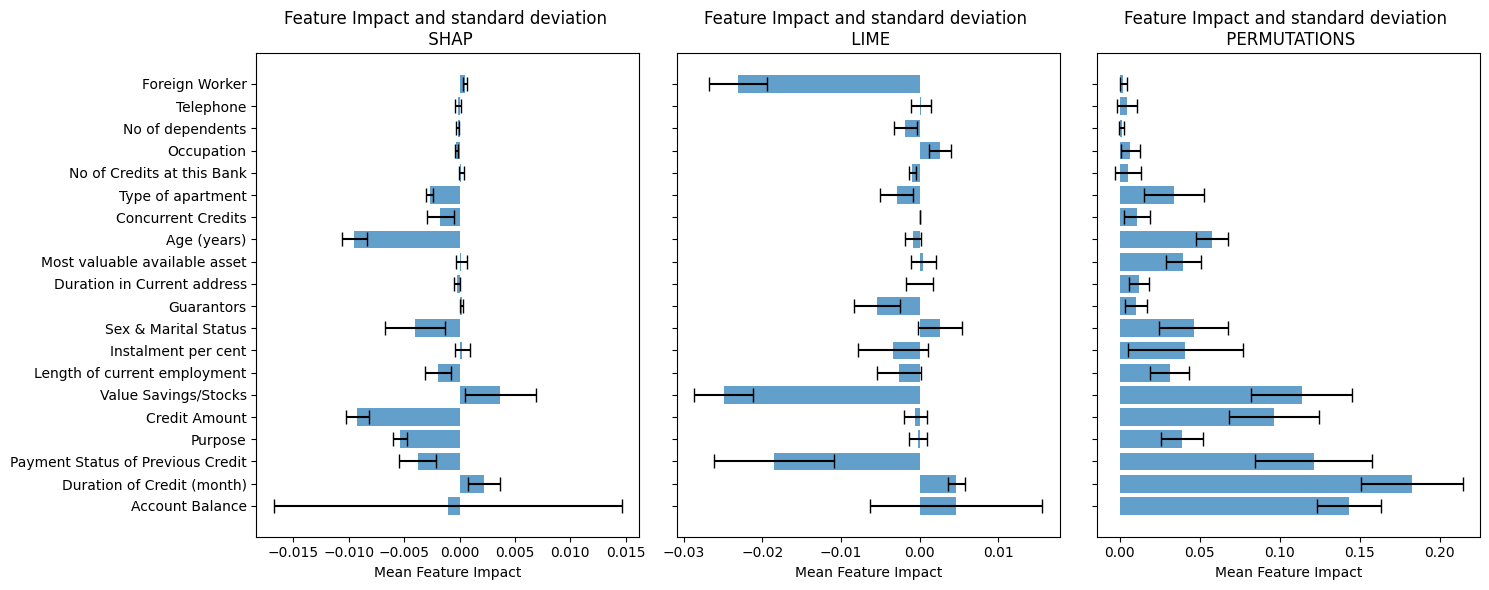

In [4]:
params = {'model': model,
          'data': X,
          'target': y,
          'custom_explainer':None,
          'verbose': False,
          'mode': mode}


for technique in COMPARISON_TECHNIQUES:
    # comparison_list.append(ComparisonFactory(**params).create_comparison(technique))
    comparison = ComparisonFactory(**params).create(technique)
    comparison.apply()
    comparison.display()

Explainers: 100%|██████████| 3/3 [00:59<00:00, 19.72s/it]


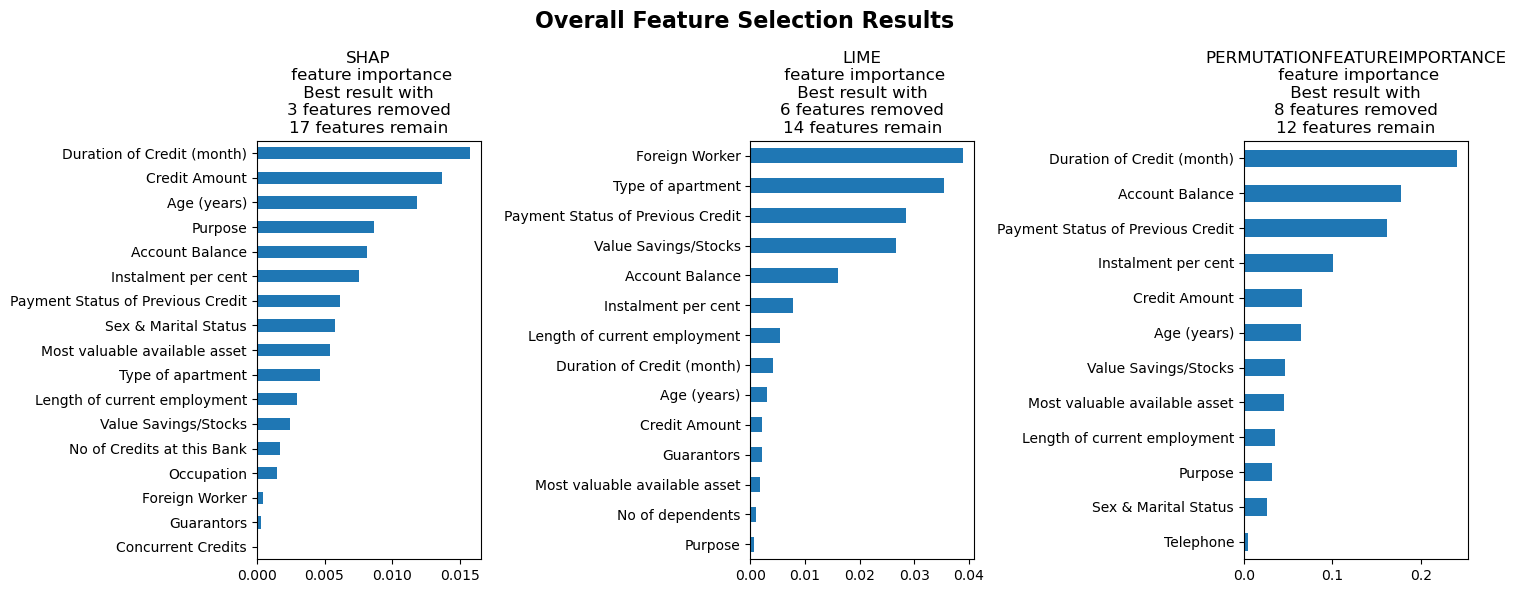

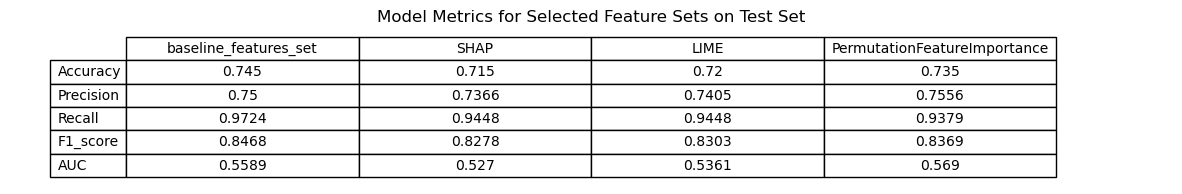

Processing folds: 100%|██████████| 5/5 [00:43<00:00,  8.72s/it]


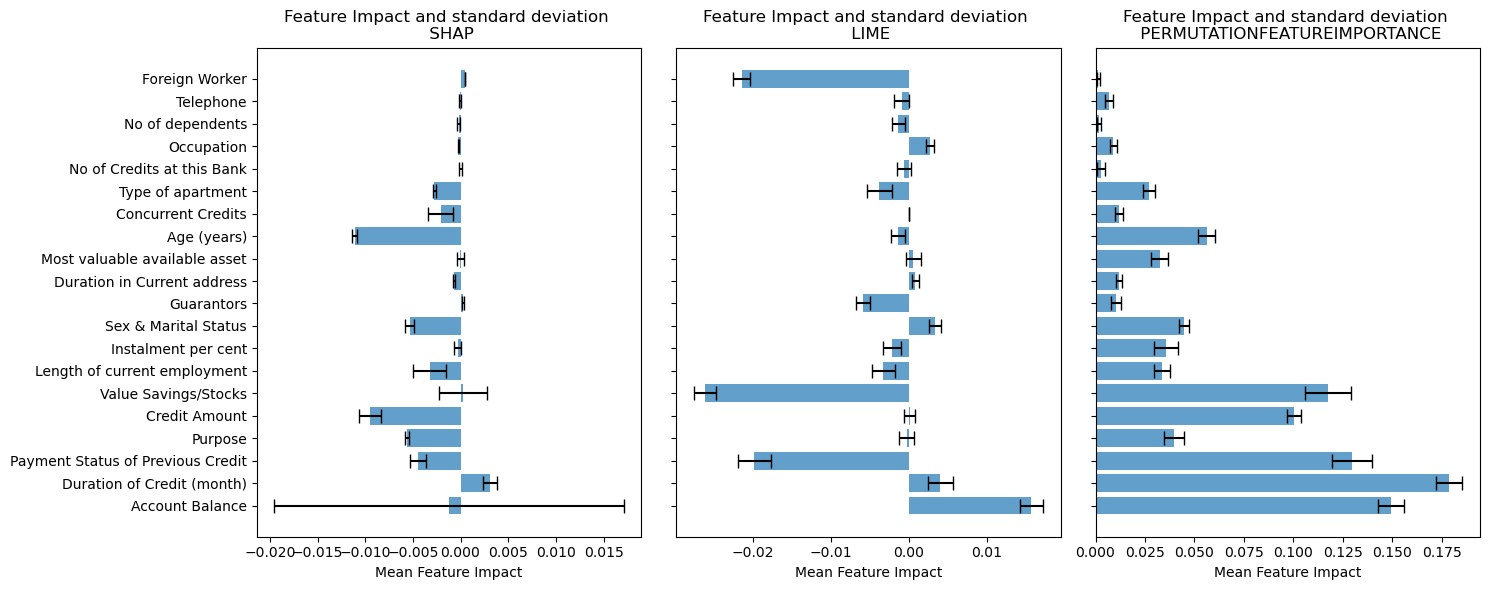

In [6]:
# explainers_list = [
#    lime_explainer = explainer_factory.create("LIME"),
#    shap_explainer = explainer_factory.create("SHAP"),
#    custom_explainer = create_my_new_explainer(...)
# ]

# comparisons_list = [
#    features_comparison = comparison_factory.create("feature_selection_technique", explainers_list),
#    consistence_comparison = comparison_factory.create("consistency_technique", explainers_list),
# ]

# for comparison in comparison_list:
#     comparison.apply()
#     comparison.display()


# Then in the future we can get it more simple, as you suggested, by defining it as a configuration and all the rest will be automatic.
# E.g.
# explainer = {LIME, SHAP}
# comparisons = {features_selection, consistency}

# main.py:
# config = read_configuration(...)
# run_explainer_tests(config)